In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
rental = pd.read_csv("data.csv", index_col=0, low_memory=False)

ParserError: Error tokenizing data. C error: Expected 11 fields in line 45789, saw 13


In [120]:
rental.info()
rental.head()

<class 'pandas.core.frame.DataFrame'>
Index: 82327 entries, Ofako to Datano
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Status       82327 non-null  int64  
 1   Region       82327 non-null  int64  
 2   Lat          82327 non-null  float64
 3   Lon          82327 non-null  float64
 4   Elev         82327 non-null  int64  
 5   Pop          82327 non-null  int64  
 6   Bed          81531 non-null  float64
 7   Bath         81391 non-null  float64
 8   Garage       67287 non-null  float64
 9   Area         55521 non-null  float64
 10  Price        36547 non-null  float64
 11  isFurnished  36547 non-null  float64
dtypes: float64(8), int64(4)
memory usage: 8.2+ MB


,Status,Region,Lat,Lon,Elev,Pop,Bed,Bath,Garage,Area,Price,isFurnished
Place,,,,,,,,,,,,
Ofako,2,1,5.59,-0.45,249,16986,2.0,2.0,150.0,0.0,NaN,NaN
Ofako,1,1,5.66,-0.27,246,407491,2.0,2.0,150.0,0.0,NaN,NaN
Ofakor,2,1,5.59,-0.45,249,16986,2.0,2.0,150.0,0.0,NaN,NaN
Ofankor,1,1,5.66,-0.27,246,407491,2.0,2.0,150.0,0.0,NaN,NaN
Ablemkpe,1,1,5.61,-0.22,269,800486,3.0,4.0,1027.0,0.0,NaN,NaN


In [90]:
rental.isnull().sum()

Status           0
Region           0
Lat              0
Lon              0
Elev             0
Pop              0
Bed            796
Bath           936
Price            0
isFurnished      0
dtype: int64

In [94]:
rental = rental.dropna()
rental = rental.reset_index(drop=True)

In [95]:
rental.isnull().sum()

Status         0
Region         0
Lat            0
Lon            0
Elev           0
Pop            0
Bed            0
Bath           0
Price          0
isFurnished    0
dtype: int64

In [32]:
rental.isnull().sum()

Status         0
Region         0
Lat            0
Lon            0
Elev           0
Pop            0
Bed            0
Bath           0
Garage         0
Area           0
Price          0
isFurnished    0
dtype: int64

In [96]:
rental.to_csv("new_data.csv")

In [97]:
rental.head()

,Status,Region,Lat,Lon,Elev,Pop,Bed,Bath,Price,isFurnished
0,2,1,5.59,-0.45,249,16986,2.0,2.0,150,0
1,1,1,5.66,-0.27,246,407491,2.0,2.0,150,0
2,2,1,5.59,-0.45,249,16986,2.0,2.0,150,0
3,1,1,5.66,-0.27,246,407491,2.0,2.0,150,0
4,1,1,5.61,-0.22,269,800486,3.0,4.0,1027,0


In [98]:
rental = rental[["Status", "Region", "Lat", "Lon", "Elev", "Pop", "Bed", "Bath","Price", "isFurnished"]]

In [99]:
rental['isFurnished'].value_counts()

0    62367
1    18744
Name: isFurnished, dtype: int64

In [100]:
with pd.option_context('float_format', '{:f}'.format): print(rental["Price"].describe())

count    81111.000000
mean      6706.893516
std       9386.617951
min          0.000000
25%        924.000000
50%       2447.000000
75%      10878.000000
max     344500.000000
Name: Price, dtype: float64


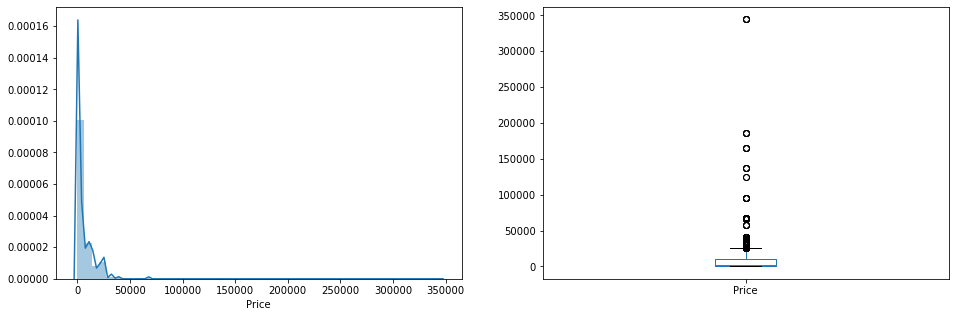

In [101]:
plt.subplot(121)
sns.distplot(rental["Price"])

plt.subplot(122)
rental["Price"].plot.box(figsize=(16,5))

plt.savefig("Price_distribution.png", bbox_inches="tight")
plt.show()

In [102]:
rental = rental[rental["Price"] <= 100000].reset_index(drop=True)

with pd.option_context('float_format', '{:f}'.format): print(rental["Price"].describe())

count   81093.000000
mean     6664.240317
std      8859.875012
min         0.000000
25%       924.000000
50%      2447.000000
75%     10878.000000
max     95000.000000
Name: Price, dtype: float64


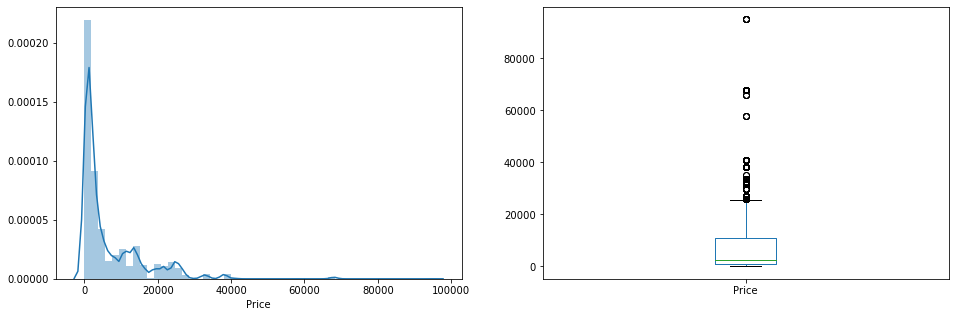

In [103]:
plt.subplot(121)
sns.distplot(rental["Price"])

plt.subplot(122)
rental["Price"].plot.box(figsize=(16,5))
plt.savefig("after_100,000_outlier_distribution.png", bbox_inches="tight")
plt.show()

In [44]:
rental = rental[rental["Price"] <= 40000].reset_index(drop=True)

with pd.option_context('float_format', '{:f}'.format): print(rental["Price"].describe())

count   81969.000000
mean     6413.785016
std      8039.390692
min         0.000000
25%       924.000000
50%      2447.000000
75%     10878.000000
max     38072.000000
Name: Price, dtype: float64


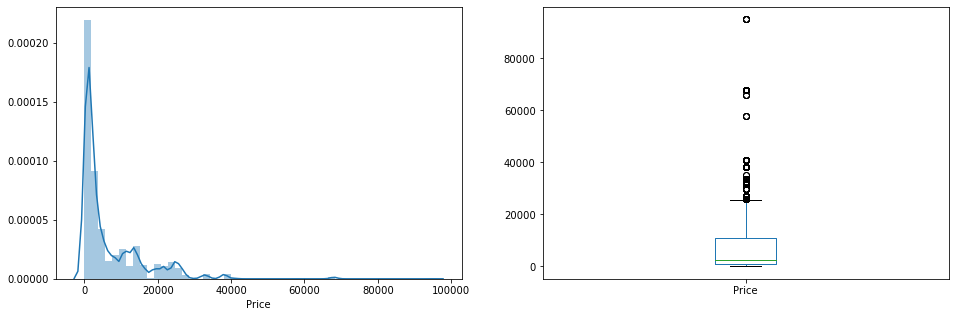

In [104]:
plt.subplot(121)
sns.distplot(rental["Price"])

plt.subplot(122)
rental["Price"].plot.box(figsize=(16,5))
plt.savefig("after_40,000_outlier_distribution.png", bbox_inches="tight")
plt.show()

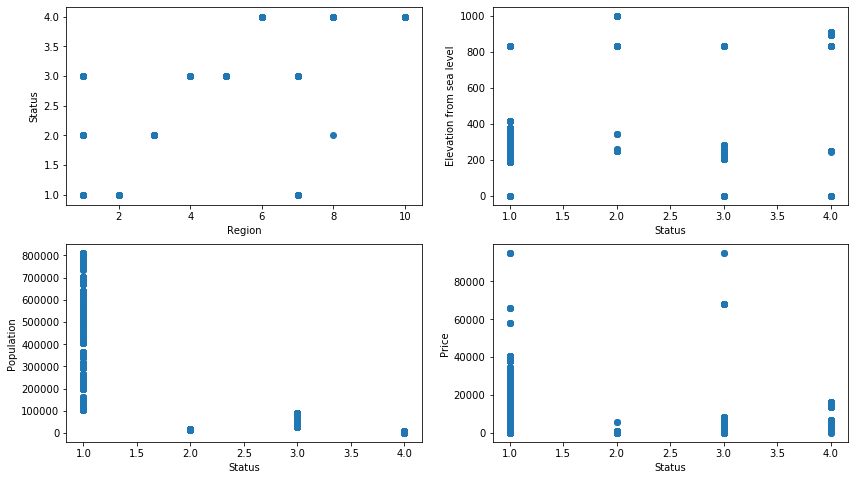

In [105]:

plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.scatter(x=rental["Region"], y=rental["Status"])
plt.xlabel("Region")
plt.ylabel("Status")

plt.subplot(2, 2, 2)
plt.scatter(x=rental["Status"], y=rental["Elev"])
plt.xlabel("Status")
plt.ylabel("Elevation from sea level")

plt.subplot(2, 2, 3)
plt.scatter(x=rental["Status"], y=rental["Pop"])
plt.xlabel("Status")
plt.ylabel("Population")

plt.subplot(2, 2, 4)
plt.scatter(x=rental["Status"], y=rental["Price"])
plt.xlabel("Status")
plt.ylabel("Price")
plt.savefig("relationships_1.png", bbox_inches="tight")

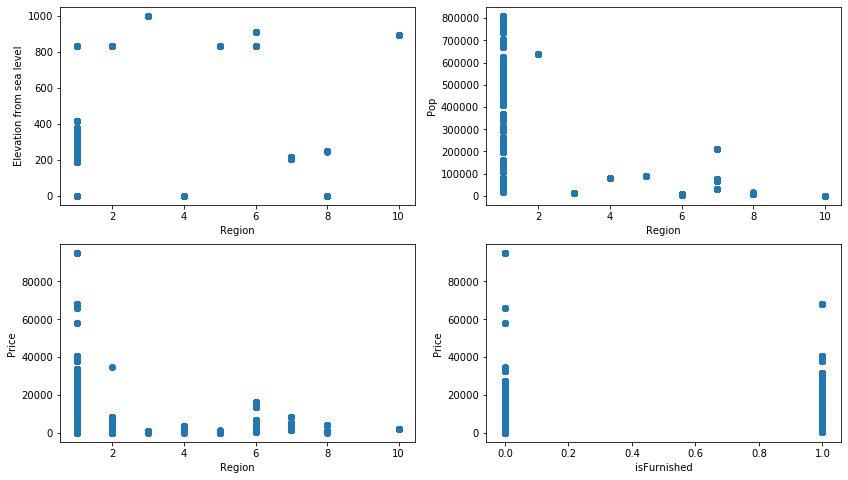

In [106]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.scatter(x=rental["Region"], y=rental["Elev"])
plt.xlabel("Region")
plt.ylabel("Elevation from sea level")

plt.subplot(2, 2, 2)
plt.scatter(x=rental["Region"], y=rental["Pop"])
plt.xlabel("Region")
plt.ylabel("Pop")

plt.subplot(2, 2, 3)
plt.scatter(x=rental["Region"], y=rental["Price"])
plt.xlabel("Region")
plt.ylabel("Price")

plt.subplot(2, 2, 4)
plt.scatter(x=rental["isFurnished"], y=rental["Price"])
plt.xlabel("isFurnished")
plt.ylabel("Price")

plt.savefig("relationships_2.png", bbox_inches="tight")

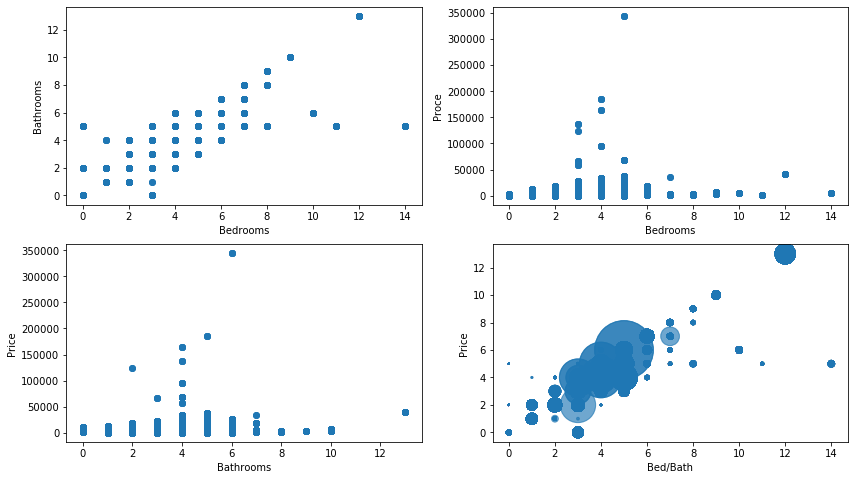

In [61]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.scatter(x=rental["Bed"], y=rental["Bath"])
plt.xlabel("Bedrooms")
plt.ylabel("Bathrooms")

plt.subplot(2, 2, 2)
plt.scatter(x=rental["Bed"], y=rental["Price"])
plt.xlabel("Bedrooms")
plt.ylabel("Proce")

plt.subplot(2, 2, 3)
plt.scatter(x=rental["Bath"], y=rental["Price"])
plt.xlabel("Bathrooms")
plt.ylabel("Price")

plt.subplot(2, 2, 4)
#rental.plot(kind="scatter", x="Lat", y="Lon", s=rental["Pop"]/1000, label="Population",colorbar=True, alpha=0.4, cmap=plt.get_cmap("jet"))
plt.scatter(x=rental["Bed"], y=rental["Bath"], s=rental["Price"]/100, label="Price", alpha=0.4, cmap=plt.get_cmap("jet"))
plt.xlabel("Bed/Bath")
plt.ylabel("Price")

plt.savefig("relationships_3.png", bbox_inches="tight")

In [107]:
corr = rental[["Status", "Region", "Lat", "Lon", "Elev", "Pop", "Bed", "Bath", "Price", "isFurnished"]].corr()

In [108]:
corr

,Status,Region,Lat,Lon,Elev,Pop,Bed,Bath,Price,isFurnished
Status,1.000000,0.848324,0.521535,-0.310281,0.352596,-0.682661,-0.104155,-0.189820,-0.019968,-0.045783
Region,0.848324,1.000000,0.474203,-0.502185,0.373022,-0.506492,-0.112949,-0.192276,-0.063404,-0.057280
Lat,0.521535,0.474203,1.000000,-0.026340,0.708104,-0.321550,-0.046130,-0.064358,0.015334,0.035680
Lon,-0.310281,-0.502185,-0.026340,1.000000,-0.486621,0.112395,0.136721,0.226433,0.121654,0.091569
Elev,0.352596,0.373022,0.708104,-0.486621,1.000000,-0.088279,-0.093214,-0.143473,-0.013774,0.008791
Pop,-0.682661,-0.506492,-0.321550,0.112395,-0.088279,1.000000,0.086984,0.147338,0.233818,0.122700
Bed,-0.104155,-0.112949,-0.046130,0.136721,-0.093214,0.086984,1.000000,0.868759,0.073125,-0.344883
Bath,-0.189820,-0.192276,-0.064358,0.226433,-0.143473,0.147338,0.868759,1.000000,0.077370,-0.321576
Price,-0.019968,-0.063404,0.015334,0.121654,-0.013774,0.233818,0.073125,0.077370,1.000000,0.405649
isFurnished,-0.045783,-0.057280,0.035680,0.091569,0.008791,0.122700,-0.344883,-0.321576,0.405649,1.000000


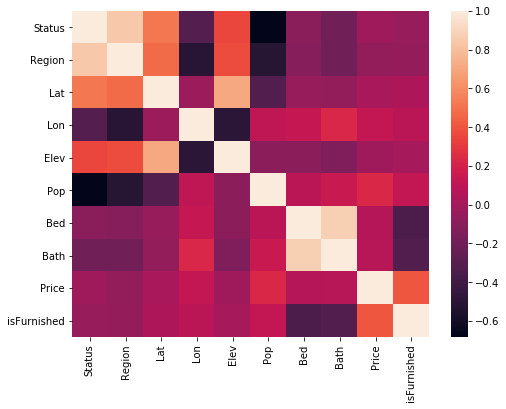

In [109]:
plt.subplots(figsize=(8,6))

fig = sns.heatmap(corr,
                 xticklabels=corr.columns.values,
                 yticklabels=corr.columns.values)

fig.get_figure().savefig("correlation.png", bbox_inches="tight")

In [110]:

rental_df = pd.get_dummies(rental)

rental_df.head()

,Status,Region,Lat,Lon,Elev,Pop,Bed,Bath,Price,isFurnished
0,2,1,5.59,-0.45,249,16986,2.0,2.0,150,0
1,1,1,5.66,-0.27,246,407491,2.0,2.0,150,0
2,2,1,5.59,-0.45,249,16986,2.0,2.0,150,0
3,1,1,5.66,-0.27,246,407491,2.0,2.0,150,0
4,1,1,5.61,-0.22,269,800486,3.0,4.0,1027,0


In [111]:
X = rental_df.drop(columns=["Price"])
Y = rental_df["Price"]

In [112]:
# split data into random train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [113]:
# fit a Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:

# make predictions
y_pred = regressor.predict(X_test)

In [115]:
# calculate R-squared
print("Liner Regression R-squared: {}".format(regressor.score(X_test, y_test)))
from sklearn.metrics import r2_score
lin_r2 = r2_score(y_test, y_pred)

print("Liner Regression R-squared: {}".format(lin_r2))

Liner Regression R-squared: 0.28114486048909837
Liner Regression R-squared: 0.28114486048909837


In [116]:
# calculate root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print("Liner Regression RMSE: {}".format(lin_rmse))

Liner Regression RMSE: 7578.6778607391625


In [117]:

# calculate mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_pred, y_test)
print("Liner Regression MAE: {}".format(lin_mae))

Liner Regression MAE: 5026.486249094054


In [118]:
# get feature coefficients
importance = regressor.coef_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{} : {}'.format(X_train.columns[index], (importance[index] )))

Region : -1183.1974339221683
Elev : -2.7910689141837675
Pop : 0.015637444537787815
Lat : 152.21405017885155
Bath : 429.9273493658867
Lon : 562.3793629809628
Bed : 902.1772639376912
Status : 5534.250641949744
isFurnished : 9377.877510460277


In [75]:

import sklearn
sklearn.__version__

'0.22.1'

In [76]:
# import libraries, we will use GridSearchCV to find the best parameter values
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)

In [77]:
# fit the model
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)